In [36]:
import IPython
from playsound import playsound
import soundfile as sf
import sounddevice as sd
import matplotlib.pyplot as plt
import PIL
from PIL import Image
from PIL import ExifTags
import glob
import exiftool ## more comprehensive than PIL
import tqdm
import pandas as pd
import numpy as np


In [37]:
results = pd.read_csv('/Volumes/CatBreen/aurora_outputs/snow_poles_outputs_resized_LRe4_BS64_E100_clean_SNEX_IN/eval_orig/results.csv')
results['abs_diff'] = np.abs(results['difference'])
error = pd.read_csv('/Users/catherinebreen/Dropbox/Chapter1/WRRsubmission/data/results_wa_images_for_error_analysis/model_error_codes.csv')


In [38]:
print(results['filename'])
print(error['image_path'])

0      W2B_WSCT0020.JPG
1      W2B_WSCT0024.JPG
2      W2B_WSCT0025.JPG
3      W2B_WSCT0036.JPG
4      W2B_WSCT0050.JPG
             ...       
887    W9G_WSCT0479.JPG
888    W9G_WSCT0484.JPG
889    W9G_WSCT0500.JPG
890    W9G_WSCT0501.JPG
891    W9G_WSCT0504.JPG
Name: filename, Length: 892, dtype: object
0      E6A_WSCT0030.JPG
1      E6A_WSCT0039.JPG
2      E6A_WSCT0049.JPG
3      E6A_WSCT0052.JPG
4      E6A_WSCT0067.JPG
             ...       
887    W9G_WSCT0479.JPG
888    W9G_WSCT0484.JPG
889    W9G_WSCT0500.JPG
890    W9G_WSCT0501.JPG
891    W9G_WSCT0504.JPG
Name: image_path, Length: 892, dtype: object


In [39]:
results = results.merge(error, left_on='filename', right_on='image_path')

In [40]:
results

,Unnamed: 0_x,Camera,filename,x1_true,y1_true,x2_true,y2_true,x1_pred,y1s_pred,x2_pred,...,manual_snowdepth,difference,abs_diff,Unnamed: 0_y,image_path,error_code1,sunny_cloudy,closed_open,patchy_cont,storm
0,0,W2B,W2B_WSCT0020.JPG,135.67105,72.996490,135.37631,186.43742,135.88866,74.563835,135.54382,...,-1.7640,-12.429601,12.429601,1,W2B_WSCT0020.JPG,0,6,open,NaN,none
1,1,W2B,W2B_WSCT0024.JPG,136.11316,72.996490,136.40790,187.22339,135.81169,73.541466,135.78185,...,-3.8880,-7.546175,7.546175,30,W2B_WSCT0024.JPG,0,6,open,NaN,none
2,2,W2B,W2B_WSCT0025.JPG,136.11316,72.996490,135.81842,185.91345,135.63493,72.851580,135.65598,...,-0.3480,-4.791996,4.791996,137,W2B_WSCT0025.JPG,0,6,open,NaN,none
3,3,W2B,W2B_WSCT0036.JPG,136.26053,72.734505,136.26053,186.43742,135.87595,73.493980,135.83720,...,-2.4720,-5.888470,5.888470,77,W2B_WSCT0036.JPG,0,6,open,NaN,none
4,4,W2B,W2B_WSCT0050.JPG,136.11316,78.236260,136.40790,191.15321,136.39491,77.997250,135.94210,...,-0.3480,-3.106759,3.106759,292,W2B_WSCT0050.JPG,0,6,open,NaN,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,887,W9G,W9G_WSCT0479.JPG,171.48158,2.783626,170.45000,152.11696,170.02644,2.232068,168.45103,...,3.8136,-5.104132,5.104132,123,W9G_WSCT0479.JPG,5,6,closed,patchy,none
888,888,W9G,W9G_WSCT0484.JPG,172.95526,3.045614,171.33421,152.11696,171.10732,2.884687,169.20663,...,4.3152,-3.190600,3.190600,278,W9G_WSCT0484.JPG,5,6,closed,patchy,none
889,889,W9G,W9G_WSCT0500.JPG,172.80789,2.521637,171.18684,152.37895,170.93670,3.208674,168.95850,...,2.7312,-3.051646,3.051646,299,W9G_WSCT0500.JPG,5,6,closed,patchy,none
890,890,W9G,W9G_WSCT0501.JPG,172.36578,2.783626,171.18684,152.11696,171.22234,3.440930,169.19492,...,3.8136,-5.846287,5.846287,80,W9G_WSCT0501.JPG,0,6,closed,NaN,none


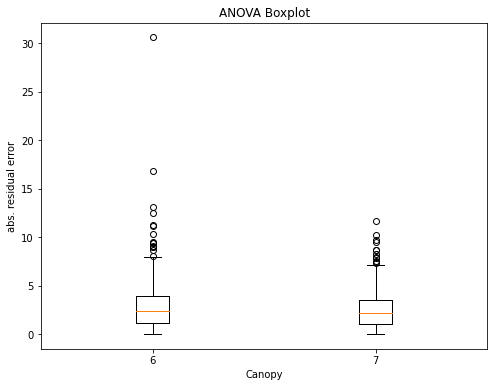

In [46]:
# Group data by 'canopy'
without_storms = results[results['error_code1']!=2]
grouped = without_storms.groupby('sunny_cloudy')['abs_diff']

# Create boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([group.values for _, group in grouped], labels=grouped.groups.keys())
plt.title('ANOVA Boxplot')
plt.xlabel('Canopy')
plt.ylabel('abs. residual error')
plt.show()

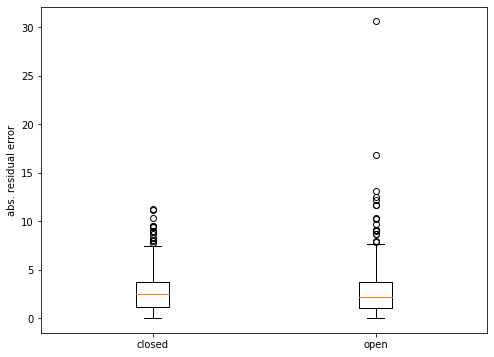

In [47]:
# Group data by 'canopy'
grouped = results.groupby('closed_open')['abs_diff']

# Create boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([group.values for _, group in grouped], labels=grouped.groups.keys())
plt.ylabel('abs. residual error')
plt.show()

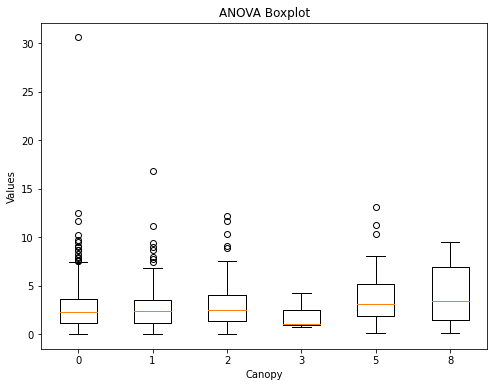

In [43]:
# Group data by 'canopy'
grouped = results.groupby('error_code1')['abs_diff']

# Create boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([group.values for _, group in grouped], labels=grouped.groups.keys())
plt.title('ANOVA Boxplot')
plt.xlabel('Canopy')
plt.ylabel('abs. residual error')
plt.show()

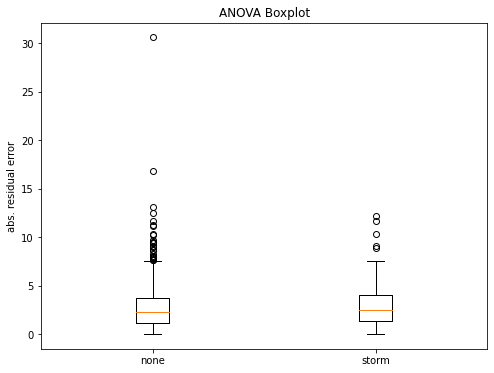

In [60]:
# Group data by 'canopy'
grouped = results.groupby('storm')['abs_diff']

# Create boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([group.values for _, group in grouped], labels=grouped.groups.keys())
plt.title('ANOVA Boxplot')
plt.ylabel('abs. residual error')
plt.show()

In [51]:
## group by month 
dateinfo = pd.read_csv('/Users/catherinebreen/Documents/Chapter1/WRRsubmission/labeledImgs_datetime_info.csv')
dateinfo.rename(columns={'filenames':'filename'}, inplace=True)
results = results.merge(dateinfo, on = 'filename', how='left')
results["date"] = pd.to_datetime(results["datetimes"])


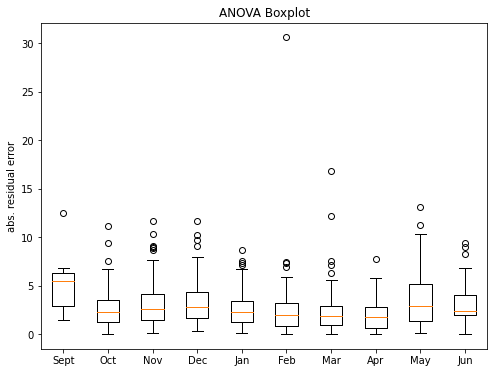

In [64]:
# Extract month from 'date' column
results['month'] = results['date'].dt.month

# Define custom order for months
custom_order = [9, 10, 11, 12, 1, 2, 3, 4, 5, 6]
custom_labels = ['Sept', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']


# Group data by 'month' and calculate average error
grouped = results.groupby('month')['abs_diff']

# Create boxplot with custom order
plt.figure(figsize=(8, 6))
plt.boxplot([grouped.get_group(month).values for month in custom_order], labels=custom_labels)
plt.title('ANOVA Boxplot')
plt.ylabel('abs. residual error')
plt.show()

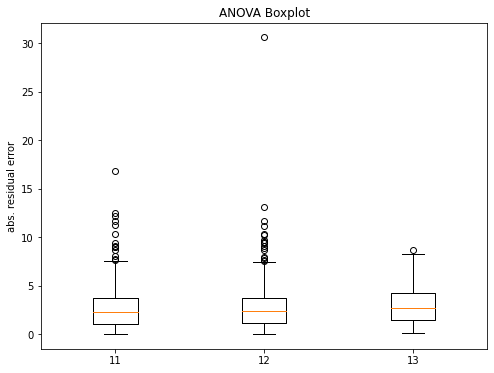

In [65]:
## group by hour of day 
results['hour'] = results['date'].dt.hour

# Group data by 'month' and calculate average error
grouped = results.groupby('hour')['abs_diff']

# Create boxplot with custom order
plt.figure(figsize=(8, 6))
plt.boxplot([group.values for _, group in grouped], labels=grouped.groups.keys())
plt.title('ANOVA Boxplot')
plt.ylabel('abs. residual error')
plt.show()

In [68]:
np.min(results['automated_depth'])

-13.097043311776249

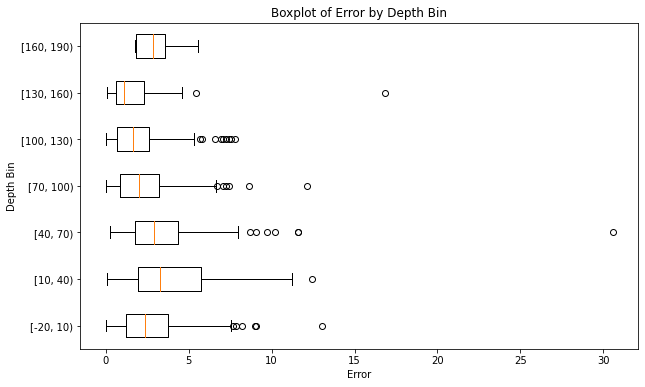

In [71]:
## group by snow depth
# Define bin edges
bin_edges = np.arange(-20, 200, 30)  # Bins of width 10 from 0 to 150

# Create 'bin' column based on 'depth' values
results['bin'] = pd.cut(results['automated_depth'], bins=bin_edges, right=False, include_lowest=True)

# Group data by 'bin' and calculate average error
grouped = results.groupby('bin')['abs_diff']

# Create boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([group.values for _, group in grouped], labels=[str(bin) for bin in grouped.groups.keys()], vert=False)
plt.title('Boxplot of Error by Depth Bin')
plt.xlabel('Error')
plt.ylabel('Depth Bin')
plt.show()